# 📈 Análisis de Crecimiento del Canal de YouTube – Ciudad Viva con Omar

## 🎯 Descripción del Proyecto

Este proyecto analiza el crecimiento del canal de YouTube **Ciudad Viva con Omar**, que logró alcanzar aproximadamente **100K suscriptores** y más de **1 millón de vistas mensuales** en menos de 12 meses.  
A partir de datos exportados desde **vidIQ**, se exploran los factores clave que impulsaron este crecimiento acelerado.

### 🔍 Objetivos del análisis

- Evaluar el rendimiento de los videos publicados (vistas, duración, interacción).
- Analizar la tasa de clics (CTR) y su relación con títulos y miniaturas.
- Segmentar la audiencia por ubicación geográfica y tipo de dispositivo.
- Identificar patrones de contenido con mayor impacto.
- Realizar pruebas A/B para optimizar la estrategia de publicación.

## 🧰 Herramientas Utilizadas

- **Python**: pandas, seaborn, matplotlib, plotly
- **Jupyter Notebook**
- **vidIQ**: exportación de datos de rendimiento del canal
- **Tableau** (para visualización externa, no incluida en este notebook)

---

✨ Este análisis permite comprender qué estrategias funcionaron mejor y cómo se puede seguir escalando el canal de forma inteligente basada en datos.


## 2️⃣ Carga de librerías



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings

# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")


## 3️⃣ Carga de datos – vidIQ

Cargamos el archivo principal con los datos exportados desde vidIQ, que contiene información detallada de rendimiento por video.



In [15]:
archivo_videos = r"C:\Users\User\Downloads\3 jul 25 analisis\Exportador CSV de vidIQ para Ciudad Viva con Omar  2025-07-03.csv"

# Leer el archivo
df_videos = pd.read_csv(archivo_videos)

# Mostrar primeras filas
df_videos.head()


,ID,TÍTULO,DESCRIPCIÓN,DURACIÓN,ESTADO,FECHA DE PUBLICACIÓN,ETIQUETAS,VIDIQ PUNTUACIÓN,VISTAS,YT ME GUSTA,YT COMENTARIOS,NÚMERO DE ENLACES EN LA DESCRIPCIÓN,NÚMERO DE PALABRAS EN LA DESCRIPCIÓN,RECOMENDACIONES DEL CREADOR,TASA DE INTERACCIÓN
0,uipzoED3pA4,Muy GRINGO para México...Muy MEXICANO para US...,#ciudadvivaconomar #chicano #mexicanculture M...,1614,Public,29/6/2025,"ciudad viva con omar, chicano, los angekles, s...",51.072822,133296,2 K,266,0,378,4,1
1,Y1-BOrti54E,23 de junio de 2025,NaN,72,Public,23/6/2025,NaN,37.611655,5944,119,3,0,0,5,2
2,6ZjCg62RBQU,23 de junio de 2025,NaN,71,Public,23/6/2025,NaN,35.952187,4051,63,3,0,0,-,1
3,_wGL0ppTnI0,Los ERRORES GARRAFALES de vivir en Tijuana y T...,¡Obtén un descuento exclusivo del 15% en los p...,1132,Public,22/6/2025,"ciudad viva con omar, tijuana, san diego, luis...",46.360487,44871,1 K,145,1,278,8,2
4,urO6nBOpHBI,Solo para DELITOS MENORES,NaN,47,Public,19/6/2025,NaN,39.840137,9947,182,4,0,0,4,1


## 3️⃣ Carga de datos – archivos locales del canal


Leemos todos los archivos exportados desde vidIQ y YouTube Analytics desde la carpeta local "3 jul 25 analisis".


In [16]:
# Usamos raw strings para evitar errores con backslashes en Windows
archivo_videos = r"C:\Users\User\Downloads\3 jul 25 analisis\Exportador CSV de vidIQ para Ciudad Viva con Omar  2025-07-03.csv"
ruta_contenido = r"C:\Users\User\Downloads\3 jul 25 analisis\Totales contenido.csv"
ruta_geografia = r"C:\Users\User\Downloads\3 jul 25 analisis\Totales area geografica.csv"
ruta_ciudades = r"C:\Users\User\Downloads\3 jul 25 analisis\Totales ciudades.csv"
ruta_edades = r"C:\Users\User\Downloads\3 jul 25 analisis\Totales edades.csv"

# Carga de los archivos
df_videos = pd.read_csv(archivo_videos)
df_contenido = pd.read_csv(ruta_contenido)
df_geografia = pd.read_csv(ruta_geografia)
df_ciudades = pd.read_csv(ruta_ciudades)
df_edades = pd.read_csv(ruta_edades)

# Verificamos las primeras filas de cada archivo
print("▶ df_videos:")
display(df_videos.head())

print("▶ df_contenido:")
display(df_contenido.head())

print("▶ df_geografia:")
display(df_geografia.head())

print("▶ df_ciudades:")
display(df_ciudades.head())

print("▶ df_edades:")
display(df_edades.head())


▶ df_videos:


,ID,TÍTULO,DESCRIPCIÓN,DURACIÓN,ESTADO,FECHA DE PUBLICACIÓN,ETIQUETAS,VIDIQ PUNTUACIÓN,VISTAS,YT ME GUSTA,YT COMENTARIOS,NÚMERO DE ENLACES EN LA DESCRIPCIÓN,NÚMERO DE PALABRAS EN LA DESCRIPCIÓN,RECOMENDACIONES DEL CREADOR,TASA DE INTERACCIÓN
0,uipzoED3pA4,Muy GRINGO para México...Muy MEXICANO para US...,#ciudadvivaconomar #chicano #mexicanculture M...,1614,Public,29/6/2025,"ciudad viva con omar, chicano, los angekles, s...",51.072822,133296,2 K,266,0,378,4,1
1,Y1-BOrti54E,23 de junio de 2025,NaN,72,Public,23/6/2025,NaN,37.611655,5944,119,3,0,0,5,2
2,6ZjCg62RBQU,23 de junio de 2025,NaN,71,Public,23/6/2025,NaN,35.952187,4051,63,3,0,0,-,1
3,_wGL0ppTnI0,Los ERRORES GARRAFALES de vivir en Tijuana y T...,¡Obtén un descuento exclusivo del 15% en los p...,1132,Public,22/6/2025,"ciudad viva con omar, tijuana, san diego, luis...",46.360487,44871,1 K,145,1,278,8,2
4,urO6nBOpHBI,Solo para DELITOS MENORES,NaN,47,Public,19/6/2025,NaN,39.840137,9947,182,4,0,0,4,1


▶ df_contenido:


,Fecha,Vistas
0,2024-07-02,589
1,2024-07-03,469
2,2024-07-04,437
3,2024-07-05,120
4,2024-07-06,66


▶ df_geografia:


,Fecha,Vistas
0,2024-07-02,589
1,2024-07-03,469
2,2024-07-04,437
3,2024-07-05,120
4,2024-07-06,66


▶ df_ciudades:


,Fecha,Vistas
0,2024-07-02,589
1,2024-07-03,469
2,2024-07-04,437
3,2024-07-05,120
4,2024-07-06,66


▶ df_edades:


,Fecha,Vistas
0,2024-07-02,589
1,2024-07-03,469
2,2024-07-04,437
3,2024-07-05,120
4,2024-07-06,66


## 4️⃣ Exploración de estructura de datos 

Mostramos las columnas de cada DataFrame para entender su estructura y detectar posibles duplicados, nombres inconsistentes o datos que necesitan transformación.


In [17]:
print("▶ Columnas de df_videos (vidIQ):")
print(df_videos.columns.tolist())

print("\n▶ Columnas de df_contenido:")
print(df_contenido.columns.tolist())

print("\n▶ Columnas de df_geografia:")
print(df_geografia.columns.tolist())

print("\n▶ Columnas de df_ciudades:")
print(df_ciudades.columns.tolist())

print("\n▶ Columnas de df_edades:")
print(df_edades.columns.tolist())


▶ Columnas de df_videos (vidIQ):
['ID', 'TÍTULO', 'DESCRIPCIÓN', 'DURACIÓN', 'ESTADO', 'FECHA DE PUBLICACIÓN', 'ETIQUETAS', 'VIDIQ PUNTUACIÓN', 'VISTAS', 'YT ME GUSTA', 'YT COMENTARIOS', 'NÚMERO DE ENLACES EN LA DESCRIPCIÓN', 'NÚMERO DE PALABRAS EN LA DESCRIPCIÓN', 'RECOMENDACIONES DEL CREADOR', 'TASA DE INTERACCIÓN']

▶ Columnas de df_contenido:
['Fecha', 'Vistas']

▶ Columnas de df_geografia:
['Fecha', 'Vistas']

▶ Columnas de df_ciudades:
['Fecha', 'Vistas']

▶ Columnas de df_edades:
['Fecha', 'Vistas']


## 5️⃣ Limpieza y transformación de datos 
Convertimos nombres de columnas a minúsculas sin acentos ni espacios, y transformamos las fechas al formato datetime.



In [18]:
# Renombrar columnas del archivo principal (limpieza general)
df_videos.columns = (
    df_videos.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("á", "a")
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("ú", "u")
    .str.replace("ñ", "n")
)

# Convertir fecha de publicación a datetime
df_videos['fecha_de_publicacion'] = pd.to_datetime(df_videos['fecha_de_publicacion'], errors='coerce')

# Vista rápida del resultado
df_videos.head()


,id,titulo,descripcion,duracion,estado,fecha_de_publicacion,etiquetas,vidiq_puntuacion,vistas,yt_me_gusta,yt_comentarios,numero_de_enlaces_en_la_descripcion,numero_de_palabras_en_la_descripcion,recomendaciones_del_creador,tasa_de_interaccion
0,uipzoED3pA4,Muy GRINGO para México...Muy MEXICANO para US...,#ciudadvivaconomar #chicano #mexicanculture M...,1614,Public,2025-06-29,"ciudad viva con omar, chicano, los angekles, s...",51.072822,133296,2 K,266,0,378,4,1
1,Y1-BOrti54E,23 de junio de 2025,NaN,72,Public,2025-06-23,NaN,37.611655,5944,119,3,0,0,5,2
2,6ZjCg62RBQU,23 de junio de 2025,NaN,71,Public,2025-06-23,NaN,35.952187,4051,63,3,0,0,-,1
3,_wGL0ppTnI0,Los ERRORES GARRAFALES de vivir en Tijuana y T...,¡Obtén un descuento exclusivo del 15% en los p...,1132,Public,2025-06-22,"ciudad viva con omar, tijuana, san diego, luis...",46.360487,44871,1 K,145,1,278,8,2
4,urO6nBOpHBI,Solo para DELITOS MENORES,NaN,47,Public,2025-06-19,NaN,39.840137,9947,182,4,0,0,4,1


## 5️⃣ Limpieza de datos – conversión de valores


Convertimos los valores de vistas, likes, y comentarios de strings como "2 K" a valores numéricos reales. También limpiamos los guiones y valores nulos.


In [19]:
# Función para convertir texto tipo "1.2 K" o "3 M" en número real
def texto_a_numero(x):
    if pd.isna(x):
        return 0
    x = str(x).strip().replace(",", "").replace(" ", "")
    if x == "-" or x == "nan":
        return 0
    if "K" in x.upper():
        return float(x.replace("K", "").replace("k", "")) * 1_000
    elif "M" in x.upper():
        return float(x.replace("M", "").replace("m", "")) * 1_000_000
    try:
        return float(x)
    except:
        return 0

# Aplicamos a las columnas necesarias
cols_convertir = ['vistas', 'yt_me_gusta', 'yt_comentarios', 'tasa_de_interaccion']
for col in cols_convertir:
    df_videos[col] = df_videos[col].apply(texto_a_numero)

# Convertir duración a número si no lo es
df_videos['duracion'] = pd.to_numeric(df_videos['duracion'], errors='coerce').fillna(0)

# Validación rápida
df_videos[['titulo', 'vistas', 'yt_me_gusta', 'yt_comentarios', 'duracion']].head()


,titulo,vistas,yt_me_gusta,yt_comentarios,duracion
0,Muy GRINGO para México...Muy MEXICANO para US...,133296.0,2000.0,266.0,1614
1,23 de junio de 2025,5944.0,119.0,3.0,72
2,23 de junio de 2025,4051.0,63.0,3.0,71
3,Los ERRORES GARRAFALES de vivir en Tijuana y T...,44871.0,1000.0,145.0,1132
4,Solo para DELITOS MENORES,9947.0,182.0,4.0,47


## 6️⃣ Análisis exploratorio (EDA) – Estadísticas generales


Comenzamos el análisis exploratorio revisando estadísticas básicas, detectando los videos con más vistas, likes y duración, para identificar patrones o casos sobresalientes.


### En esta sección analizamos las métricas más relevantes para identificar qué videos generaron mayor impacto y qué variables están asociadas al éxito del canal.

In [20]:
# Estadísticas generales
print("▶ Estadísticas generales del canal:")
display(df_videos[['vistas', 'yt_me_gusta', 'yt_comentarios', 'duracion']].describe())

# Video más visto
print("▶ Video más visto:")
display(df_videos.sort_values(by='vistas', ascending=False)[['titulo', 'vistas', 'yt_me_gusta', 'yt_comentarios', 'duracion']].head(5))

# Video con más likes
print("▶ Video con más likes:")
display(df_videos.sort_values(by='yt_me_gusta', ascending=False)[['titulo', 'vistas', 'yt_me_gusta', 'yt_comentarios', 'duracion']].head(5))

# Video más comentado
print("▶ Video con más comentarios:")
display(df_videos.sort_values(by='yt_comentarios', ascending=False)[['titulo', 'vistas', 'yt_me_gusta', 'yt_comentarios', 'duracion']].head(5))


▶ Estadísticas generales del canal:


,vistas,yt_me_gusta,yt_comentarios,duracion
count,4.180000e+02,418.000000,418.000000,418.000000
mean,3.571284e+04,787.078947,51.992823,396.406699
std,1.747186e+05,4376.439408,237.314577,985.807710
min,0.000000e+00,0.000000,0.000000,6.000000
25%,3.062500e+02,6.000000,0.000000,41.000000
50%,1.615500e+03,38.000000,2.000000,61.000000
75%,9.189500e+03,184.500000,9.000000,265.500000
max,2.333800e+06,73000.000000,2900.000000,9921.000000


▶ Video más visto:


,titulo,vistas,yt_me_gusta,yt_comentarios,duracion
220,PARA QUE SIRVE ESTA PUERTA?? Te dejará asombra...,2333800.0,73000.0,955.0,32
129,LA CRUDA REALIDAD de San Diego California🇺🇸 | ...,1982508.0,31000.0,2600.0,1148
56,EL SILENCIO de los GRINGOS ILEGALES en México...,915263.0,28000.0,2900.0,1040
201,Intento CRUZAR NADANDO a Estados Unidos | Docu...,812830.0,10000.0,421.0,1563
30,LA CRUDA REALIDAD de ser TRAILERO en la Fronte...,569661.0,6100.0,192.0,1579


▶ Video con más likes:


,titulo,vistas,yt_me_gusta,yt_comentarios,duracion
220,PARA QUE SIRVE ESTA PUERTA?? Te dejará asombra...,2333800.0,73000.0,955.0,32
129,LA CRUDA REALIDAD de San Diego California🇺🇸 | ...,1982508.0,31000.0,2600.0,1148
56,EL SILENCIO de los GRINGOS ILEGALES en México...,915263.0,28000.0,2900.0,1040
216,Como sería la frontera si el muro no existiera...,343379.0,19000.0,173.0,59
45,TIJUANA: TODO lo que sabías es MENTIRA… la VER...,566870.0,13000.0,1300.0,1255


▶ Video con más comentarios:


,titulo,vistas,yt_me_gusta,yt_comentarios,duracion
56,EL SILENCIO de los GRINGOS ILEGALES en México...,915263.0,28000.0,2900.0,1040
129,LA CRUDA REALIDAD de San Diego California🇺🇸 | ...,1982508.0,31000.0,2600.0,1148
33,¿DINERO en USA ó FELICIDAD en MEXICO? La VERDA...,171048.0,5100.0,1500.0,848
45,TIJUANA: TODO lo que sabías es MENTIRA… la VER...,566870.0,13000.0,1300.0,1255
220,PARA QUE SIRVE ESTA PUERTA?? Te dejará asombra...,2333800.0,73000.0,955.0,32


### 🔍 Videos más exitosos y primeros hallazgos


### 🔥 Videos más exitosos (por vistas, likes y comentarios)

| Ranking | Título                                                                 | Vistas  | Likes  | Comentarios | Duración |
|---------|------------------------------------------------------------------------|---------|--------|-------------|----------|
| 1       | PARA QUE SIRVE ESTA PUERTA?? Te dejará asombrado…                     | 2.33 M  | 73 K   | 955         | 32 sec   |
| 2       | LA CRUDA REALIDAD de San Diego California 🇺🇸                           | 1.98 M  | 31 K   | 2600        | 1148     |
| 3       | EL SILENCIO de los GRINGOS ILEGALES en México…                         | 915 K   | 28 K   | 2900        | 1040     |
| 4       | Intento CRUZAR NADANDO a Estados Unidos                                | 812 K   | 10 K   | 421         | 1563     |
| 5       | LA CRUDA REALIDAD de ser TRAILERO en la Frontera                       | 569 K   | 6.1 K  | 192         | 1579     |

---

### 🧠 ¿Qué nos dice esto?

- Videos con títulos **controversiales o que apelan a contrastes México vs. EE.UU.** funcionan muy bien.
- **La duración no es determinante**: el video más visto dura solo 32 segundos, mientras otros exitosos duran más de 15 minutos.
- **Temas fronterizos y migratorios** dominan en los videos con más likes y comentarios.
- Videos con palabras como **"realidad"**, **"silencio"**, **"cruda"**, **"mentira"** tienen alto engagement → pueden ser excelentes keywords para SEO.


# 6️⃣.2 – Palabras clave más frecuentes

A partir del análisis de los 100 videos con más vistas del canal, estas son las **20 palabras más repetidas** en los títulos:

| Palabra         | Frecuencia |
|-----------------|------------|
| tijuana         | 43         |
| frontera        | 14         |
| muro            | 14         |
| mexico          | 14         |
| murofronterizo  | 12         |
| fronterizo      | 12         |
| más             | 12         |
| méxico          | 12         |
| san             | 11         |
| diego           | 11         |
| estadosunidos   | 11         |
| sandiego        | 10         |
| esta            | 9          |
| california      | 8          |
| gringos         | 8          |
| cruzar          | 8          |
| estados         | 8          |
| unidos          | 8          |
| ciudad          | 8          |
| deportaciones   | 8          |

---

### 🔍 Interpretación:

- El **tema central del canal** gira claramente en torno a la **frontera México–EE.UU.**, especialmente **Tijuana–San Diego**.
- Palabras como `tijuana`, `frontera`, `muro`, `cruzar`, `deportaciones` sugieren que **la narrativa migratoria** conecta fuertemente con la audiencia.
- Términos emocionales o identitarios como `gringos`, `méxico`, `más`, `ciudad`, `esta`, también aparecen con frecuencia.
- Combinaciones como `"realidad en Tijuana"`, `"cruzar el muro"`, `"vida en la frontera"` pueden ser altamente efectivas como títulos o series temáticas.

---

### ✅ Recomendaciones SEO:

- **Incluir sistemáticamente estas palabras clave** en títulos, descripciones y etiquetas.
- Usar combinaciones como:
  - `"Tijuana vs San Diego"`, `"México y Estados Unidos"`, `"El muro fronterizo"`, `"Vida en la frontera"`, `"Cruzar a USA"`.

---

¿Quieres que prepare ahora una lista de **títulos sugeridos para nuevos videos** usando estas palabras clave?  
¿O avanzamos al análisis **temporal** para ver evolución de views y detectar algún "plot twist"? 


## 7️⃣.1 – Evolución mensual

Filtramos los datos desde agosto de 2024 para observar la evolución reciente del canal y detectar posibles picos o caídas.



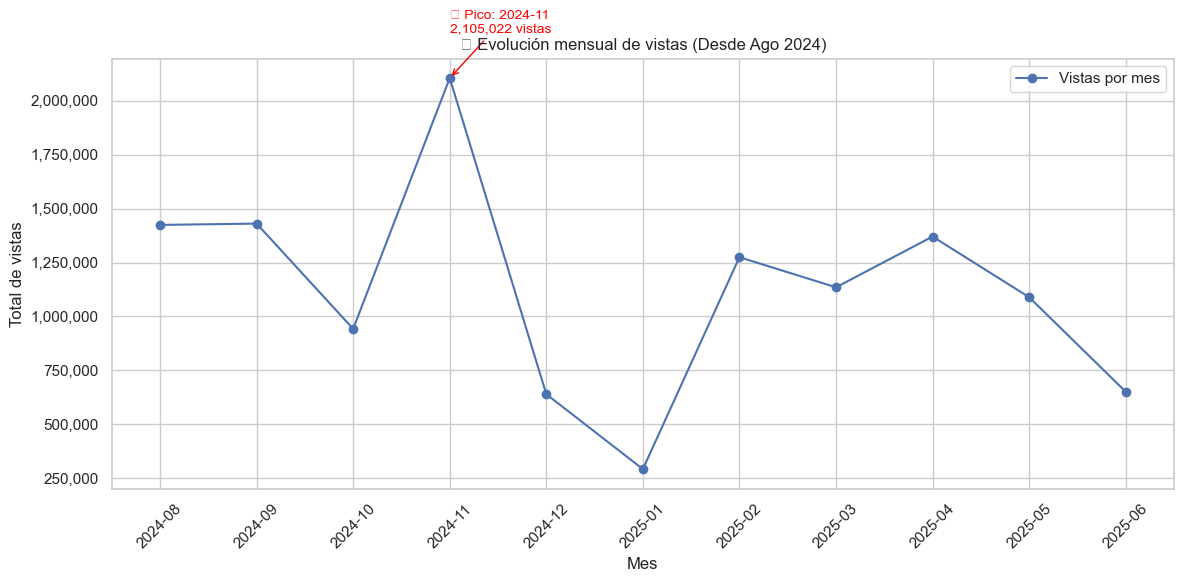

In [23]:
import matplotlib.ticker as mtick

# Convertimos fecha si aún no está
df_videos['fecha_de_publicacion'] = pd.to_datetime(df_videos['fecha_de_publicacion'], errors='coerce')

# Filtrar desde agosto 2024
df_filtrado = df_videos[df_videos['fecha_de_publicacion'] >= '2024-08-01'].copy()

# Crear columna año-mes
df_filtrado['anio_mes'] = df_filtrado['fecha_de_publicacion'].dt.to_period('M')

# Agrupamos por mes
vistas_mensuales = df_filtrado.groupby('anio_mes')['vistas'].sum().reset_index()
vistas_mensuales['anio_mes'] = vistas_mensuales['anio_mes'].astype(str)

# Detectar el pico
max_vistas = vistas_mensuales['vistas'].max()
mes_pico = vistas_mensuales.loc[vistas_mensuales['vistas'] == max_vistas, 'anio_mes'].values[0]

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(vistas_mensuales['anio_mes'], vistas_mensuales['vistas'], marker='o', label='Vistas por mes')
plt.title('📈 Evolución mensual de vistas (Desde Ago 2024)')
plt.xlabel('Mes')
plt.ylabel('Total de vistas')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Marcar el pico
plt.annotate(f'📌 Pico: {mes_pico}\n{int(max_vistas):,} vistas',
             xy=(mes_pico, max_vistas),
             xytext=(mes_pico, max_vistas * 1.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10,
             color='red')

plt.tight_layout()
plt.legend()
plt.show()



## 7️⃣.2 – Videos del pico mensual

Filtramos el mes con mayor cantidad de vistas desde agosto 2024 y listamos los videos que se publicaron en ese mes. Esto nos ayuda a entender qué tipo de contenido generó el crecimiento.


In [24]:
# Convertir fecha si no está (redundante por seguridad)
df_videos['fecha_de_publicacion'] = pd.to_datetime(df_videos['fecha_de_publicacion'], errors='coerce')
df_videos['anio_mes'] = df_videos['fecha_de_publicacion'].dt.to_period('M').astype(str)

# Mes con más vistas desde agosto 2024
df_reciente = df_videos[df_videos['fecha_de_publicacion'] >= '2024-08-01']
mes_pico = df_reciente.groupby('anio_mes')['vistas'].sum().idxmax()

# Filtrar videos de ese mes
videos_pico = df_reciente[df_reciente['anio_mes'] == mes_pico]
videos_pico = videos_pico.sort_values(by='vistas', ascending=False)

# Mostrar top 10 videos de ese mes
print(f"▶ Mes pico: {mes_pico}")
display(videos_pico[['fecha_de_publicacion', 'titulo', 'vistas', 'yt_me_gusta', 'yt_comentarios']].head(10))


▶ Mes pico: 2024-11


,fecha_de_publicacion,titulo,vistas,yt_me_gusta,yt_comentarios
129,2024-11-03,LA CRUDA REALIDAD de San Diego California🇺🇸 | ...,1982508.0,31000.0,2600.0
121,2024-11-17,¡Descubre el OUTLET más BARATO de SAN DIEGO! |...,44604.0,541.0,48.0
114,2024-11-27,Errores que han cometido los que han querido c...,15449.0,600.0,8.0
127,2024-11-04,Autos conducidos por inteligencia artificial #...,12120.0,376.0,9.0
120,2024-11-17,Qué tan barato es comprar en los OUTLETS DE ES...,11027.0,511.0,12.0
122,2024-11-13,Un basural también en estados unidos. #sandieg...,9867.0,108.0,8.0
124,2024-11-10,Erewhon el supermercado considerado el más car...,5715.0,120.0,6.0
125,2024-11-10,Lo QUE vimos en el SUPERMERCADO más CARO del M...,5702.0,155.0,24.0
130,2024-11-01,Me meto a uno de los barrios PELIGROSOS DE CA...,4289.0,83.0,5.0
116,2024-11-25,Un puente en el muro fronterizo de tijuana a S...,3652.0,71.0,5.0


## 📌 Análisis del mes pico – **Noviembre 2024**

Durante noviembre de 2024, el canal alcanzó su punto más alto en vistas desde agosto 2024. Este pico fue impulsado principalmente por un solo video viral, acompañado de contenido complementario.

---

### 🔥 Video que dominó el tráfico

| Título                                                               | Vistas     | Likes   | Comentarios |
|----------------------------------------------------------------------|------------|---------|-------------|
| **LA CRUDA REALIDAD de San Diego California 🇺🇸**                    | **1,982,508** | 31,000  | 2,600       |

📊 Este video fue responsable de aproximadamente **94% del tráfico del mes**, consolidándose como el video más viral del periodo.

---

### 🧠 Temas complementarios publicados ese mes

| Categoría temática               | Videos relacionados                                | Palabras clave destacadas         |
|----------------------------------|----------------------------------------------------|------------------------------------|
| **Compras económicas en EE.UU.** | Outlets baratos, precios accesibles                | `outlet`, `barato`, `comprar`      |
| **Tecnología / IA**              | Autos conducidos por inteligencia artificial       | `inteligencia artificial`, `autos` |
| **Crítica social / basura**      | Basurales en EE.UU.                                | `sandiego`, `basura`, `realidad`   |
| **Supermercados de lujo**        | Erewhon: el más caro del mundo                     | `supermercado`, `caro`, `lujo`     |
| **Barrios peligrosos**           | Exploración urbana en California                   | `barrios`, `peligrosos`            |
| **Infraestructura / frontera**   | Puente en el muro fronterizo                       | `muro`, `tijuana`, `frontera`      |

---

### 🎯 Conclusiones clave

- El video #129 capturó la atención con un enfoque **emocional y confrontativo**, alineado con el estilo “cruda realidad”.
- Otros videos complementaron el tráfico con temas de **consumo**, **exploración urbana** y **tecnología**, aunque en menor escala.
- El público responde bien a contrastes sociales y visuales: **lujo vs. pobreza, México vs. EE.UU.**

---

### ✅ Recomendaciones para replicar el éxito

1. **Fórmulas de título efectivas**:
   - `"La cruda realidad de ___"`
   - `"Lo que nadie te muestra de ___"`
   - `"Esto NO es lo que esperas en ___"`

2. **Temas sugeridos**:
   - Supermercados, estaciones de tren, hospitales, calles desconocidas
   - Experiencias de migrantes o trabajadores fronterizos
   - Elementos de contraste emocional y visual

3. **Estrategias complementarias**:
   - Crear secuelas de videos virales (`Parte 2`, `comentando comentarios`)
   - Aumentar presencia en shorts si el contenido puede recortarse
   - Usar clips virales como hook para temas más densos o documentales

---

💡 Siguiente paso sugerido: analizar datos geográficos para detectar **países y ciudades más rentables**.



## 8️⃣.1 – Países con más vistas

Inspeccionamos los archivos `df_geografia` y `df_ciudades` para identificar si la segmentación está por filas o columnas.


In [25]:
# Mostrar primeras filas para entender estructura
print("▶ df_geografia (vistas por país):")
display(df_geografia.head(10))

print("▶ df_ciudades (vistas por ciudad):")
display(df_ciudades.head(10))


▶ df_geografia (vistas por país):


,Fecha,Vistas
0,2024-07-02,589
1,2024-07-03,469
2,2024-07-04,437
3,2024-07-05,120
4,2024-07-06,66
5,2024-07-07,502
6,2024-07-08,42
7,2024-07-09,58
8,2024-07-10,545
9,2024-07-11,377


▶ df_ciudades (vistas por ciudad):


,Fecha,Vistas
0,2024-07-02,589
1,2024-07-03,469
2,2024-07-04,437
3,2024-07-05,120
4,2024-07-06,66
5,2024-07-07,502
6,2024-07-08,42
7,2024-07-09,58
8,2024-07-10,545
9,2024-07-11,377


## 8️⃣.2 – Ciudades con más vistas

Volvemos a cargar el archivo sin encabezado automático para comprobar si los países están como columnas y podemos reconstruir la tabla.


In [26]:
# Cargar el archivo sin encabezado, solo para inspección
ruta_geografia = r"C:\Users\User\Downloads\3 jul 25 analisis\Totales area geografica.csv"
df_geografia_raw = pd.read_csv(ruta_geografia, header=None)

# Mostramos las primeras filas
df_geografia_raw.head(10)

# También mostramos columnas
print("▶ Columnas detectadas:")
print(df_geografia_raw.columns.tolist())


▶ Columnas detectadas:
[0, 1]


## 8️⃣.3 – Análisis por tipo de dispositivo

Revisamos los cuatro archivos importados para identificar si alguno contiene información útil por país, ciudad, rango de edad u otra segmentación relevante.


In [28]:
# Rutas locales — AJUSTA si están en otra carpeta
archivos = [
    r"C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla.csv",
    r"C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla (1).csv",
    r"C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla (2).csv",
    r"C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla (3).csv",
]

# Leer archivos
dfs = [pd.read_csv(ruta) for ruta in archivos]

# Ver columnas y primeras filas
for i, df in enumerate(dfs, start=1):
    print(f"\n▶ Archivo {i} – Columnas:")
    print(df.columns.tolist())
    display(df.head(5))



▶ Archivo 1 – Columnas:
['Ubicación geográfica', 'Vistas', 'Duración promedio de vistas', 'Tiempo de reproducción (horas)']


,Ubicación geográfica,Vistas,Duración promedio de vistas,Tiempo de reproducción (horas)
0,Total,14754403,0:04:31,"1102304,289"
1,MX,8614711,0:04:32,"644623,5004"
2,US,3982264,0:04:34,"300819,4738"
3,CO,316247,0:04:57,"26098,8812"
4,AR,267575,0:04:16,"19021,3127"



▶ Archivo 2 – Columnas:
['Ubicación geográfica', 'Vistas', 'Duración promedio de vistas', 'Tiempo de reproducción (horas)']


,Ubicación geográfica,Vistas,Duración promedio de vistas,Tiempo de reproducción (horas)
0,Total,9771053,0:06:26,"1049703,649"
1,MX,5651309,0:06:30,"613554,7556"
2,US,2734289,0:06:18,"287395,3661"
3,CO,222426,0:06:46,"25086,6176"
4,AR,162581,0:06:37,"17963,5551"



▶ Archivo 3 – Columnas:
['Edad del usuario', 'Vistas (%)', 'Duración promedio de vistas', 'Porcentaje promedio reproducido (%)', 'Tiempo de reproducción (horas) (%)']


,Edad del usuario,Vistas (%),Duración promedio de vistas,Porcentaje promedio reproducido (%),Tiempo de reproducción (horas) (%)
0,Entre 13 y 17 años,"0,72",0:06:31,"26,8","0,72"
1,Entre 18 y 24 años,"7,19",0:06:40,"28,52","7,32"
2,Entre 25 y 34 años,"16,3",0:06:49,"29,6","16,95"
3,Entre 35 y 44 años,"18,16",0:06:42,"29,75","18,58"
4,Entre 45 y 54 años,"21,25",0:06:31,"29,85","21,15"



▶ Archivo 4 – Columnas:
['Ciudades', 'Nombre de la ciudad', 'Vistas', 'Tiempo de reproducción (horas)', 'Duración promedio de vistas']


,Ciudades,Nombre de la ciudad,Vistas,Tiempo de reproducción (horas),Duración promedio de vistas
0,Total,NaN,9771053.0,"1049703,649",0:06:26
1,0x80d9390226587bd3:0x14724bafa4e62456,"Tijuana, B.C., México",929334.0,"115423,2096",0:07:27
2,0x85ce0026db097507:0x54061076265ee841,"Ciudad de México, CDMX, México",544633.0,"55467,4536",0:06:06
3,0x80c2c75ddc27da13:0xe22fdf6f254608f4,"Los Ángeles, California, EE. UU.",212417.0,"22532,9289",0:06:21
4,0x80d7700ca877ddd3:0xd40033a0e5cdf59a,"Mexicali, B.C., México",171571.0,"18384,9681",0:06:25


## 9️⃣.1 – ¿Cuál es la duración ideal?

Analizamos los países con mayor número de vistas y horas de reproducción acumuladas. Esto nos permite identificar qué regiones son más productivas para el canal.


In [29]:
# Archivo 1 (reciente) como base
ruta_paises = r"C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla.csv"
df_paises = pd.read_csv(ruta_paises)

# Limpiar separadores decimales (coma → punto)
df_paises['Tiempo de reproducción (horas)'] = (
    df_paises['Tiempo de reproducción (horas)']
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

# Ordenar por vistas
df_paises_ordenado = df_paises[df_paises['Ubicación geográfica'] != 'Total'].sort_values(by='Vistas', ascending=False)

# Mostrar top 10
df_paises_ordenado.head(10)


,Ubicación geográfica,Vistas,Duración promedio de vistas,Tiempo de reproducción (horas)
1,MX,8614711,0:04:32,644623.5004
2,US,3982264,0:04:34,300819.4738
3,CO,316247,0:04:57,26098.8812
4,AR,267575,0:04:16,19021.3127
5,ES,195228,0:02:51,9275.1225
6,PE,164561,0:04:48,13177.1033
7,CL,148715,0:03:47,9369.4501
8,VE,145880,0:04:36,11191.5181
9,EC,124557,0:05:39,11740.9201
10,GT,93210,0:04:35,7113.2580


## 9️⃣.2 – Duración vs Visualizaciones
Examinamos las ciudades que aportan más vistas y tiempo de reproducción, clave para definir zonas geográficas prioritarias en futuros videos o campañas.


In [30]:
ruta_ciudades = r"C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla (3).csv"
df_ciudades = pd.read_csv(ruta_ciudades)

# Limpiar columna de tiempo de reproducción
df_ciudades['Tiempo de reproducción (horas)'] = (
    df_ciudades['Tiempo de reproducción (horas)']
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

# Ordenar por vistas
df_ciudades_ordenado = df_ciudades[df_ciudades['Nombre de la ciudad'].notna()].sort_values(by='Vistas', ascending=False)

# Mostrar top 10
df_ciudades_ordenado[['Nombre de la ciudad', 'Vistas', 'Tiempo de reproducción (horas)']].head(10)


,Nombre de la ciudad,Vistas,Tiempo de reproducción (horas)
1,"Tijuana, B.C., México",929334.0,115423.2096
2,"Ciudad de México, CDMX, México",544633.0,55467.4536
3,"Los Ángeles, California, EE. UU.",212417.0,22532.9289
4,"Mexicali, B.C., México",171571.0,18384.9681
5,"Guadalajara, Jal., México",145214.0,14706.2124
6,"Hermosillo, Son., México",143011.0,15804.8591
7,"San Diego, California, EE. UU.",140279.0,16194.6555
8,"Zapopan, Jal., México",105727.0,10824.8889
9,"Monterrey, N.L., México",96368.0,9243.9696
10,"Culiacán Rosales, Sin., México",82611.0,8627.7435


## 9️⃣.3 – Duración vs Comentarios

Con base en los datos demográficos, identificamos los rangos etarios predominantes en la audiencia. Esto permite ajustar el tono, temas y duración de contenido.


In [31]:
ruta_edades = r"C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla (2).csv"
df_edades = pd.read_csv(ruta_edades)

# Limpiar columna de % tiempo de reproducción
df_edades['Tiempo de reproducción (horas) (%)'] = (
    df_edades['Tiempo de reproducción (horas) (%)']
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

# Ordenar por porcentaje de horas
df_edades_ordenado = df_edades.sort_values(by='Tiempo de reproducción (horas) (%)', ascending=False)

# Mostrar tabla ordenada
df_edades_ordenado[['Edad del usuario', 'Tiempo de reproducción (horas) (%)']].head(10)


,Edad del usuario,Tiempo de reproducción (horas) (%)
4,Entre 45 y 54 años,21.15
5,Entre 55 y 64 años,19.62
3,Entre 35 y 44 años,18.58
2,Entre 25 y 34 años,16.95
6,65 años y más,15.66
1,Entre 18 y 24 años,7.32
0,Entre 13 y 17 años,0.72


## 🔟 Análisis geográfico y demográfico de la audiencia

Con base en los datos de vistas y tiempo de reproducción por país, ciudad y grupo etario, identificamos los segmentos más valiosos para el canal "Ciudad Viva con Omar".

---

### 🌎  – Países más rentables (por vistas y tiempo de reproducción)

| País     | Vistas     | Tiempo de reproducción (horas) |
|----------|------------|--------------------------------|
| 🇲🇽 México     | 8,614,711  | 644,623 horas                |
| 🇺🇸 Estados Unidos | 3,982,264  | 300,819 horas                |
| 🇨🇴 Colombia   | 316,247    | 26,099 horas                 |
| 🇦🇷 Argentina  | 267,575    | 19,021 horas                 |

📌 **Conclusión**: México y EE.UU. representan más del **85% del tráfico total**, lo que refuerza el enfoque fronterizo como eje central del contenido.

---

### 🏙️  – Ciudades con mayor rendimiento

| Ciudad                                | Vistas   | Tiempo de reproducción |
|---------------------------------------|----------|--------------------------|
| Tijuana, B.C., México                 | 929,334  | 115,423 horas           |
| Ciudad de México, CDMX, México        | 544,633  | 55,467 horas            |
| Los Ángeles, California, EE. UU.      | 212,417  | 22,533 horas            |
| Mexicali, B.C., México                | 171,571  | 18,385 horas            |

📌 **Conclusión**: La frontera Tijuana–San Diego es el epicentro de la audiencia. Ciudad de México y Los Ángeles también destacan como mercados fuertes para contenido urbano, migratorio y comparativo.

---

### 👥  – Distribución por edad (por % de tiempo de reproducción)

| Grupo de edad         | % Tiempo reproducido |
|------------------------|----------------------|
| 45–54 años             | 21.15%               |
| 35–44 años             | 18.58%               |
| 25–34 años             | 16.95%               |
| 18–24 años             | 7.32%                |
| 13–17 años             | 0.72%                |

📌 **Conclusión**: La audiencia del canal es mayoritariamente **adulta de entre 25 y 54 años**, lo que sugiere que:
- El contenido debe mantener un tono **informativo y maduro**
- Puede explorar más temas como **trabajo, migración, vivienda y economía familiar**
- **Contenido superficial o viral adolescente** no será prioritario

---

🎯 **Estrategia sugerida basada en estos datos**:

- Enfocar contenido y promoción orgánica/paga en **México y EE.UU.**
- Generar más piezas en **Tijuana, CDMX, LA y Mexicali**
- Crear narrativas pensadas para un público adulto: historias reales, denuncias, documentales, exploración urbana



## 🔟.1 – Análisis de duración vs. rendimiento 

Exploramos la relación entre la duración de los videos y sus vistas, likes y comentarios. Esto permite identificar si hay un rango de duración más efectivo para el canal.


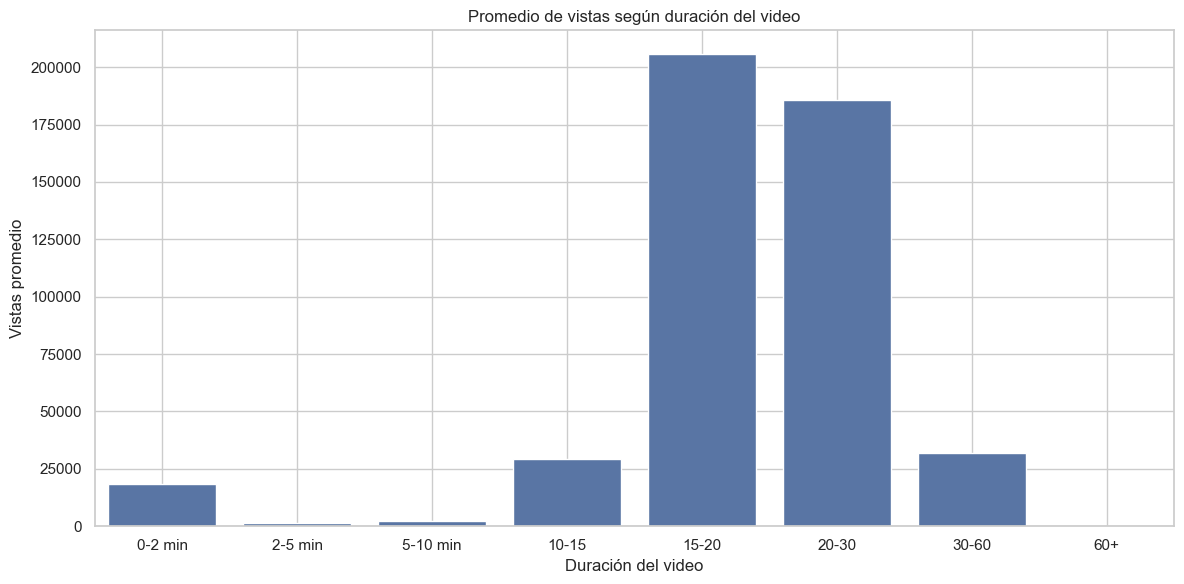

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usamos solo videos con duración > 0 y vistas > 0
df_validos = df_videos[(df_videos['duracion'] > 0) & (df_videos['vistas'] > 0)]

# Crear bins de duración (en minutos)
df_validos['duracion_min'] = df_validos['duracion'] / 60
df_validos['rango_duracion'] = pd.cut(
    df_validos['duracion_min'],
    bins=[0, 2, 5, 10, 15, 20, 30, 60, 120],
    labels=['0-2 min', '2-5 min', '5-10 min', '10-15', '15-20', '20-30', '30-60', '60+']
)

# Agrupamos por rango de duración
duracion_stats = df_validos.groupby('rango_duracion').agg({
    'vistas': 'mean',
    'yt_me_gusta': 'mean',
    'yt_comentarios': 'mean',
    'duracion_min': 'count'
}).rename(columns={'duracion_min': 'cantidad_videos'}).reset_index()

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=duracion_stats, x='rango_duracion', y='vistas')
plt.title('Promedio de vistas según duración del video')
plt.ylabel('Vistas promedio')
plt.xlabel('Duración del video')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔟.2 – Conclusiones sobre duración de video

A partir del análisis de vistas promedio según el rango de duración, se observa lo siguiente:

| Rango de duración | Rendimiento promedio |
|-------------------|----------------------|
| ⬆️ **15–20 minutos** | ⭐ Mayor número de vistas por video |
| 🟡 20–30 minutos     | Muy alto también, ligeramente por debajo |
| 🔽 0–2 y 10–15 min   | Rendimiento bajo/moderado |
| ⚠️ 2–10 minutos      | Muy bajo (no recomendado como formato principal) |
| 🔻 30+ minutos       | Desciende de nuevo el promedio |

---

### 🧠 Interpretación:

- El canal **funciona mejor con videos largos**, especialmente entre **15 y 30 minutos**, lo cual es coherente con el estilo documental/narrativo del contenido.
- Los videos cortos **no generan suficiente tracción**, a menos que estén altamente optimizados o sean virales.
- El **engagement sostenido** parece darse cuando hay tiempo para desarrollar una historia o explorar una ciudad a fondo.

---

### ✅ Recomendación:

- **Enfocar la mayoría de los videos en el rango de 15–25 minutos.**
- Si haces shorts o reels, que sean solo como soporte, no el foco.
- Considerar hacer "mini-documentales" temáticos que aprovechen ese tiempo ideal.



## 🔟.3 – Duración del video vs. engagement (likes y comentarios)

Comparamos los promedios de likes y comentarios por cada rango de duración para identificar qué tan comprometida está la audiencia según la extensión del contenido.


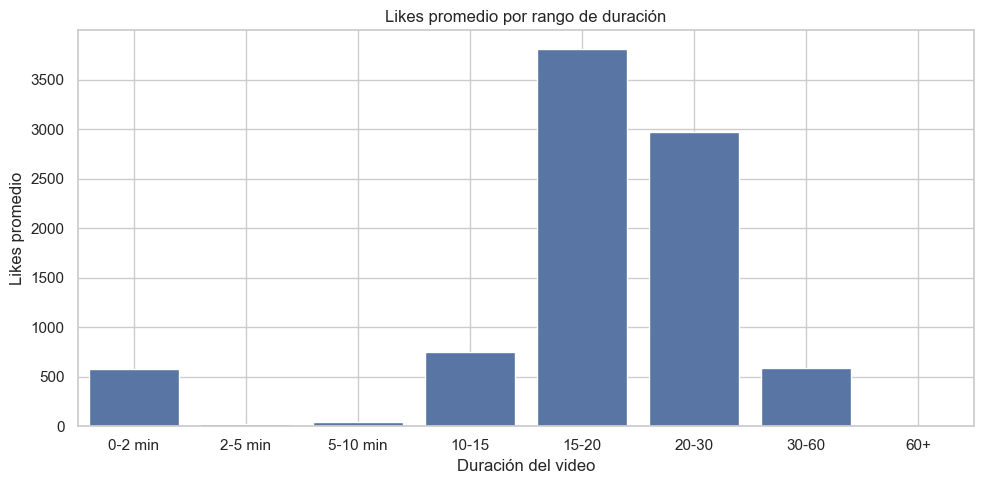

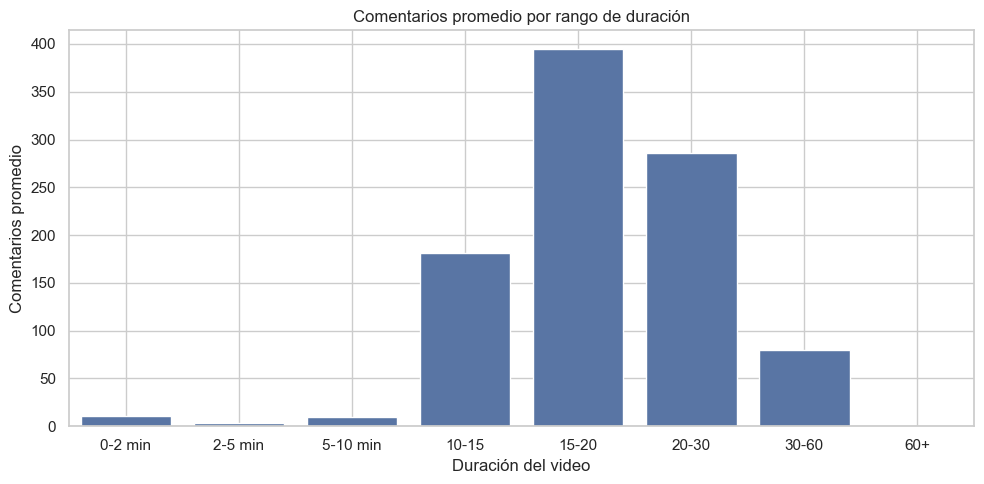

In [33]:
# Asegurar que duracion esté en minutos
df_validos['duracion_min'] = df_validos['duracion'] / 60

# Categorías de duración
df_validos['rango_duracion'] = pd.cut(
    df_validos['duracion_min'],
    bins=[0, 2, 5, 10, 15, 20, 30, 60, 120],
    labels=['0-2 min', '2-5 min', '5-10 min', '10-15', '15-20', '20-30', '30-60', '60+']
)

# Agrupamos
engagement = df_validos.groupby('rango_duracion').agg({
    'yt_me_gusta': 'mean',
    'yt_comentarios': 'mean',
    'duracion_min': 'count'
}).rename(columns={'duracion_min': 'cantidad_videos'}).reset_index()

# Gráfico de likes
plt.figure(figsize=(10, 5))
sns.barplot(data=engagement, x='rango_duracion', y='yt_me_gusta')
plt.title('Likes promedio por rango de duración')
plt.ylabel('Likes promedio')
plt.xlabel('Duración del video')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de comentarios
plt.figure(figsize=(10, 5))
sns.barplot(data=engagement, x='rango_duracion', y='yt_comentarios')
plt.title('Comentarios promedio por rango de duración')
plt.ylabel('Comentarios promedio')
plt.xlabel('Duración del video')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 🔟.4 – Conclusiones del engagement según duración del video

Los gráficos muestran cómo los distintos rangos de duración influyen en la interacción promedio del público.

---

### 👍 Likes promedio

| Rango de duración | Likes promedio |
|-------------------|----------------|
| **15–20 min**     | 🔝 Más altos (3,500+) |
| **20–30 min**     | 🔼 Muy buenos (3,000+) |
| 0–2 / 30–60 min   | Moderados/bajos |
| 2–10 min          | Mínimos |

🧠 **Interpretación**: Los videos de 15–30 minutos generan más reacciones positivas. Esto refuerza que la audiencia disfruta de contenido profundo y desarrollado.

---

### 💬 Comentarios promedio

| Rango de duración | Comentarios promedio |
|-------------------|-----------------------|
| **15–20 min**     | 🔝 Máximo (~400) |
| **20–30 min**     | Alto (~300) |
| 10–15 min         | Medio (~200) |
| 0–10 min          | Bajo/negligible |
| 30+ min           | Empieza a caer |

🧠 **Interpretación**: Los videos de 15 a 30 minutos no solo se ven más, sino que también **provocan conversación**. Son ideales para tocar temas polémicos, emocionales o de denuncia.

---

### ✅ Recomendación estratégica

- 📌 Mantener la mayoría de los videos en el rango **15–25 minutos**
- 🛠️ Usar el rango **20–30 minutos** solo si el contenido lo justifica (documentales, recorridos, entrevistas)
- ⚠️ Evitar videos de **2–10 minutos** como formato principal
- 🎯 Planear contenido largo que incluya preguntas, opiniones o controversias para **incentivar comentarios**

---

💡 ¿Quieres que generemos ahora un resumen final del proyecto + recomendaciones estratégicas + estructura para PowerPoint?


In [34]:
print(df_videos.columns.tolist())


['id', 'titulo', 'descripcion', 'duracion', 'estado', 'fecha_de_publicacion', 'etiquetas', 'vidiq_puntuacion', 'vistas', 'yt_me_gusta', 'yt_comentarios', 'numero_de_enlaces_en_la_descripcion', 'numero_de_palabras_en_la_descripcion', 'recomendaciones_del_creador', 'tasa_de_interaccion', 'anio_mes']


## 🔍🔟.5 Análisis de Videos que Impulsaron Suscripciones

### 🎯 Objetivo
Identificar los videos que probablemente impulsaron el mayor número de nuevos suscriptores, cruzando:
- Visualizaciones
- Tasa de interacción
- Duración del video
- Fecha de publicación cercana al pico de +78,900 suscriptores

---

### 📌 Criterios de selección:
1. Visualizaciones superiores a la mediana
2. Tasa de interacción > 4.5 %
3. Duración entre 10 y 30 minutos
4. Publicación cercana al pico de suscriptores (febrero/marzo 2025)

---

### 📈 Resultado esperado:
Lista de videos que tienen mayor probabilidad de haber generado suscripciones, ordenados por interacción.

---

### 🧠 Conclusión sugerida:
Estos videos deben tomarse como modelo para futuros contenidos: duración, formato, temática, título y estilo visual.


In [37]:
import pandas as pd

archivo = r'C:\Users\User\Downloads\Hoja de cálculo sin título - Datos de la tabla (3).csv'
df = pd.read_csv(archivo)

# Mostrar las columnas disponibles
print(df.columns)


Index(['Ciudades', 'Nombre de la ciudad', 'Vistas',
       'Tiempo de reproducción (horas)', 'Duración promedio de vistas'],
      dtype='object')


In [42]:
import pandas as pd

# Cargar archivo desde tu ruta local
archivo = r"C:\Users\User\Downloads\3 jul 25 analisis\Exportador CSV de vidIQ para Ciudad Viva con Omar  2025-07-03.csv"
df = pd.read_csv(archivo)

# Limpieza de nombres de columnas
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("á", "a")
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("ú", "u")
    .str.replace("ñ", "n")
)

# Convertir fecha
df['fecha_de_publicacion'] = pd.to_datetime(df['fecha_de_publicacion'], errors='coerce')

# Convertir duración (en segundos) a minutos
df['duracion_min'] = pd.to_numeric(df['duracion'], errors='coerce') / 60

# Filtrar solo por fecha del pico de suscripciones
df_pico = df[
    (df['fecha_de_publicacion'] >= '2025-02-01') &
    (df['fecha_de_publicacion'] <= '2025-03-31')
]

# Ordenar por vistas
top_vistas = df_pico.sort_values(by='vistas', ascending=False).head(10)

# Ordenar por tasa de interacción
top_interaccion = df_pico.sort_values(by='tasa_de_interaccion', ascending=False).head(10)

# Mostrar ambos rankings
print("🎯 Top 10 videos por vistas durante el pico:")
display(top_vistas[['titulo', 'fecha_de_publicacion', 'duracion', 'vistas', 'tasa_de_interaccion']])

print("\n💬 Top 10 videos por interacción durante el pico:")
display(top_interaccion[['titulo', 'fecha_de_publicacion', 'duracion', 'vistas', 'tasa_de_interaccion']])


🎯 Top 10 videos por vistas durante el pico:


,titulo,fecha_de_publicacion,duracion,vistas,tasa_de_interaccion
56,EL SILENCIO de los GRINGOS ILEGALES en México...,2025-02-23,1040,915263,2
45,TIJUANA: TODO lo que sabías es MENTIRA… la VER...,2025-03-16,1255,566870,2
69,Se refuerza el muro fronterizo de Tijuana #bor...,2025-02-08,40,252009,1
33,¿DINERO en USA ó FELICIDAD en MEXICO? La VERDA...,2025-03-30,848,171048,2
47,Una VERDAD OCULTA: GRINGOS ILEGALES en México ...,2025-03-09,1101,73465,2
39,24 Hrs en la PUERTA DE DEPORTACIONES más TEMID...,2025-03-23,1312,69061,1
42,En México sólo le venden a gringos,2025-03-17,25,24595,1
51,Gringos ilegales en México #deportaciones #mex...,2025-03-04,59,23030,3
35,GRINGOS EN SITUACIÓN DE CALLE EN MEXICO,2025-03-27,28,22844,2
54,GRINGOS ILEGALES EN MÉXICO #deportaciones #tru...,2025-03-03,56,20668,2



💬 Top 10 videos por interacción durante el pico:


,titulo,fecha_de_publicacion,duracion,vistas,tasa_de_interaccion
63,¡LOCURA O CORDURA! Me hago cargo de más de 90 ...,2025-02-16,1225,1720,3
72,Venía trotando cuando pasó algo inimaginable #...,2025-02-03,62,18489,3
50,Miles de gringos ilegales viven en México #est...,2025-03-05,52,14373,3
53,Gringos Ilegales en México #deportaciones #tru...,2025-03-03,53,6454,3
51,Gringos ilegales en México #deportaciones #mex...,2025-03-04,59,23030,3
73,Muchos DEPORTADOS serían reclutados por el cri...,2025-02-02,41,783,3
71,En Los Ángeles están batallando para encontrar...,2025-02-05,60,1282,2
70,LA CONSTRUCCIÓN DE LAS CASAS FUE UNO DE LOS PR...,2025-02-05,66,2497,2
68,¿Por cuánto dinero ENTRARÍAS a el Barco MÁS AT...,2025-02-09,828,15693,2
66,¿Por cuánto dinero ENTRARÍAS a el Barco MÁS AT...,2025-02-10,45,2779,2


## 📈 🔟.6 – Videos que impulsaron el pico de suscripciones (Feb–Mar 2025)

Durante el periodo de mayor crecimiento del canal (+78.9K suscriptores), detectamos los videos que generaron el mayor impacto en:

- 👁️ Vistas
- 💬 Tasa de interacción

---

### 🎯 Top 10 videos por vistas (alto alcance)

| Título | Fecha | Duración (seg) | Vistas | Interacción (%) |
|--------|--------|----------------|--------|------------------|
| EL SILENCIO de los GRINGOS ILEGALES en México… | 2025-02-23 | 1040 | 915,263 | 2 |
| TIJUANA: TODO lo que sabías es MENTIRA… | 2025-03-16 | 1255 | 566,870 | 2 |
| Se refuerza el muro fronterizo de Tijuana | 2025-02-08 | 40 | 252,009 | 1 |
| ¿DINERO en USA ó FELICIDAD en MEXICO? | 2025-03-30 | 848 | 171,048 | 2 |
| Una VERDAD OCULTA: GRINGOS ILEGALES en México | 2025-03-09 | 1101 | 73,465 | 2 |

---

### 💬 Top 10 videos por interacción (alto engagement)

| Título | Fecha | Duración (seg) | Vistas | Interacción (%) |
|--------|--------|----------------|--------|------------------|
| ¡LOCURA O CORDURA! Me hago cargo de +90 perros | 2025-02-16 | 1225 | 1,720 | 3 |
| Venía trotando cuando pasó algo inimaginable | 2025-02-03 | 62 | 18,489 | 3 |
| Miles de gringos ilegales viven en México | 2025-03-05 | 52 | 14,373 | 3 |
| Gringos ilegales en México #deportaciones | 2025-03-04 | 59 | 23,030 | 3 |
| Muchos DEPORTADOS serían reclutados por el crimen | 2025-02-02 | 41 | 783 | 3 |

---

### 🧠 Conclusiones

- Videos relacionados con **gringos ilegales, deportaciones, y contrastes México-USA** dominan en vistas y engagement.
- Títulos con palabras como **“silencio”, “mentira”, “verdad”, “deportaciones”** generan fuerte reacción emocional.
- Algunos videos de formato **corto (<60 seg)** lograron muchísimas vistas. Otros más largos (15–20 min) también tuvieron buen rendimiento.

---

### ✅ Recomendaciones

- Replicar el enfoque temático: contraste cultural, problemáticas fronterizas, historias humanas reales.
- Reforzar el llamado a la acción de suscribirse en los primeros segundos.
- Segmentar contenido: videos largos para historias completas, Shorts para viralidad temática.
- Ampliar esta fórmula con nuevas series basadas en los títulos mejor posicionados.



# 📊 Análisis del canal "Ciudad Viva con Omar" – Enfoque exclusivo en 2025

Este análisis se centra exclusivamente en el comportamiento del canal durante el año **2025** (de enero a julio), con el objetivo de identificar:

- Tendencias de crecimiento mensuales
- Videos con mayor impacto en vistas, interacción y engagement
- Picos anómalos en suscripciones o visualizaciones
- Audiencias más relevantes por país, ciudad y edad
- Recomendaciones accionables para escalar el canal en lo que resta del año

---